# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malkapur
Processing Record 2 of Set 1 | ust'-ilimsk
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | salym
Processing Record 5 of Set 1 | rongelap
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | keflavik
Processing Record 11 of Set 1 | guamal
Processing Record 12 of Set 1 | noshiro
Processing Record 13 of Set 1 | kachug
Processing Record 14 of Set 1 | duluth
Processing Record 15 of Set 1 | port glaud
City not found. Skipping...
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | ugoofaaru
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | longyearbyen
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malkapur,20.8833,76.2000,83.62,77,100,15.70,IN,1690433618
1,ust'-ilimsk,58.0006,102.6619,82.04,42,59,4.16,RU,1690433618
2,adamstown,-25.0660,-130.1015,67.10,60,28,8.66,PN,1690433618
3,salym,60.0625,71.4789,72.70,60,33,6.64,RU,1690433618
4,rongelap,11.1635,166.8941,83.39,76,100,17.74,MH,1690433618
5,grytviken,-54.2811,-36.5092,33.76,99,100,12.71,GS,1690433619
6,port-aux-francais,-49.3500,70.2167,40.30,79,83,34.23,TF,1690433619
7,broken hill,-31.9500,141.4333,68.65,31,31,17.63,AU,1690433619
8,wailua homesteads,22.0669,-159.3780,82.83,80,0,13.80,US,1690433619
9,keflavik,64.0049,-22.5624,46.83,93,0,5.75,IS,1690433471


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malkapur,20.8833,76.2000,83.62,77,100,15.70,IN,1690433618
1,ust'-ilimsk,58.0006,102.6619,82.04,42,59,4.16,RU,1690433618
2,adamstown,-25.0660,-130.1015,67.10,60,28,8.66,PN,1690433618
3,salym,60.0625,71.4789,72.70,60,33,6.64,RU,1690433618
4,rongelap,11.1635,166.8941,83.39,76,100,17.74,MH,1690433618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

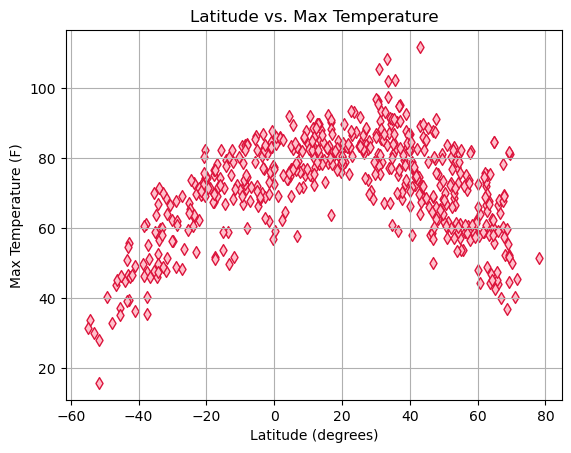

In [14]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

#Construct scatterplot

plt.scatter(latitudes, max_temps, color="pink", edgecolor="crimson", linewidths=1, marker="d")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (F)")
plt.grid(True)



# Save the figure
plt.savefig("C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

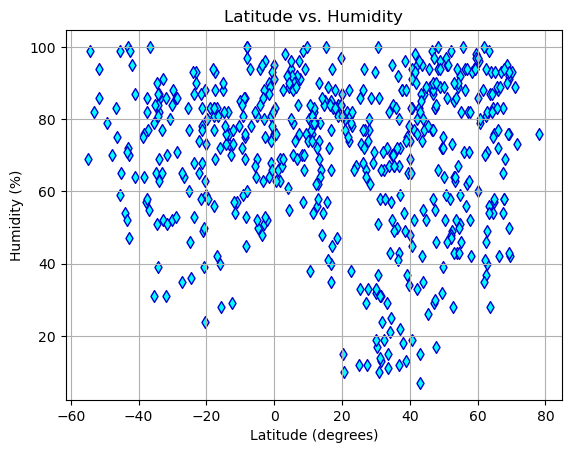

In [16]:
# Build the scatter plots for latitude vs. humidity
humidities = city_data_df["Humidity"]

#Construct scatterplot

plt.scatter(latitudes, humidities, color="cyan", edgecolor="mediumblue", linewidths=1, marker="d")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

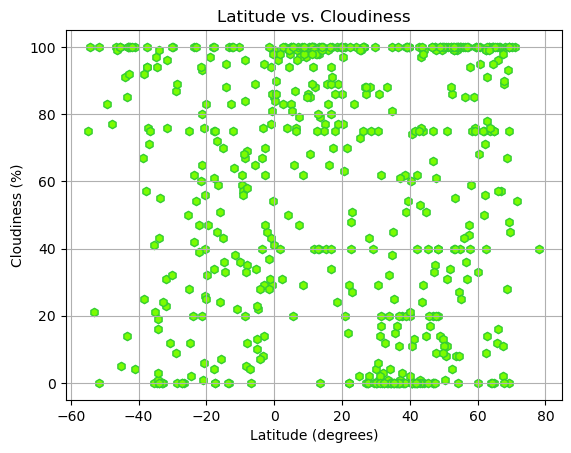

In [17]:
# Build the scatter plots for latitude vs. cloudiness
cloudinesses = city_data_df["Cloudiness"]


#Construct scatterplot

plt.scatter(latitudes, cloudinesses, color="lawngreen", edgecolor="limegreen", linewidths=1, marker="h")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

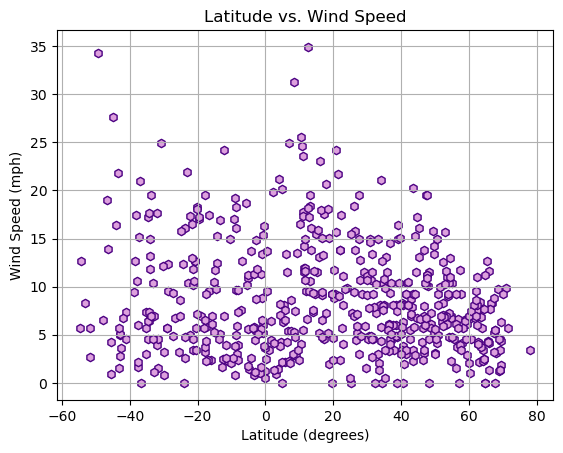

In [18]:
# Build the scatter plots for latitude vs. wind speed
wind_speeds = city_data_df["Wind Speed"]

#Construct scatterplot

plt.scatter(latitudes, wind_speeds, color="plum", edgecolor="indigo", linewidths=1, marker="h")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regression_model(x, y, y_axis_label, title, anchor, anchor_2, fig_name):
    
    #run regression and then plot
    #scipy.stats.linregress returns slope, intercept, rvalue, pvalue, and stderr
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regression_data = x*slope + intercept
    rounded_slope = round(slope, 3)
    rounded_intercept = round(intercept, 3)
    rounded_rvalue_squared = round((rvalue**2), 4)
    line = f"y = {rounded_slope}x + {rounded_intercept}"  #Rounded values so it would fit on plot..
    
    #plot data and overlay linear regression data
    
    plt.scatter(x, y, color="tan", edgecolor="chocolate", linewidths=1)
    plt.plot(x, regression_data, color="fuchsia")
    plt.annotate(line,anchor)  #displays line on plot anchored and point 'anchor'
    plt.annotate(f"R value is {rounded_rvalue_squared}", anchor_2) #displays R value
    plt.xlabel("Latitude (degrees)")
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.savefig(f"C:/Users/samee/OneDrive/Desktop/Analysis_Projects/Assignment 6/Starter_Code/output_data/{fig_name}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malkapur,20.8833,76.2000,83.62,77,100,15.70,IN,1690433618
1,ust'-ilimsk,58.0006,102.6619,82.04,42,59,4.16,RU,1690433618
3,salym,60.0625,71.4789,72.70,60,33,6.64,RU,1690433618
4,rongelap,11.1635,166.8941,83.39,76,100,17.74,MH,1690433618
8,wailua homesteads,22.0669,-159.3780,82.83,80,0,13.80,US,1690433619


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,67.10,60,28,8.66,PN,1690433618
5,grytviken,-54.2811,-36.5092,33.76,99,100,12.71,GS,1690433619
6,port-aux-francais,-49.3500,70.2167,40.30,79,83,34.23,TF,1690433619
7,broken hill,-31.9500,141.4333,68.65,31,31,17.63,AU,1690433619
14,port lincoln,-34.7333,135.8667,63.73,65,97,17.20,AU,1690433621


###  Temperature vs. Latitude Linear Regression Plot

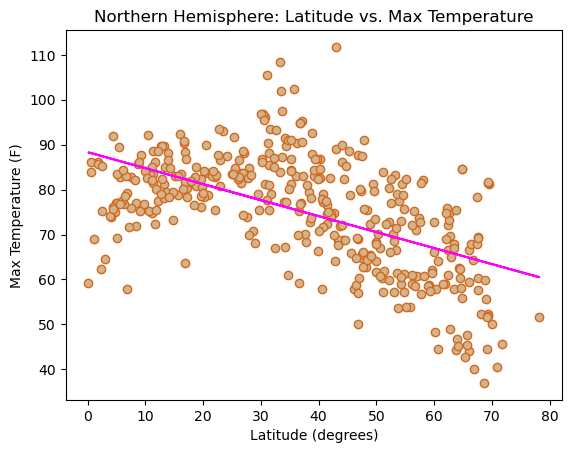

In [25]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

linear_regression_model(x, y, "Max Temperature (F)", "Northern Hemisphere: Latitude vs. Max Temperature", (0, 0), (0, -10), "Fig_5.png")

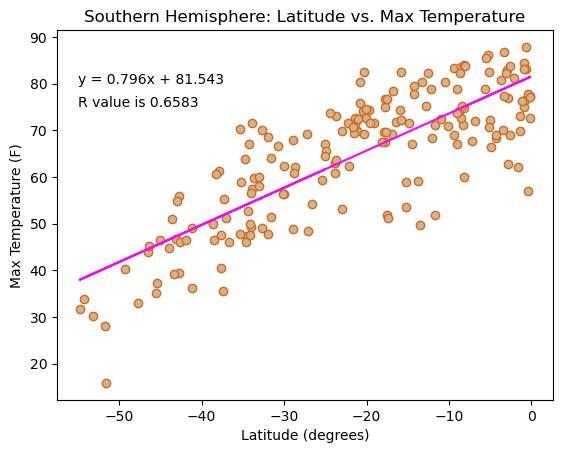

In [24]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

linear_regression_model(x, y, "Max Temperature (F)", "Southern Hemisphere: Latitude vs. Max Temperature", (-55, 80), (-55, 75), "Fig_6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In Northern hemisphere plot shows inverse relationship between Laitutde and Max Temp which implies as we move away from equator, max temperatures are dropping.
In southern hemisphere plot shows as latitude increases (in magnitude! It decreases numerically since they're, by convention, negative numbers), the temperature increases implying as we move towards equator away from southern pole, maximum temeperatures are increasing.

### Humidity vs. Latitude Linear Regression Plot

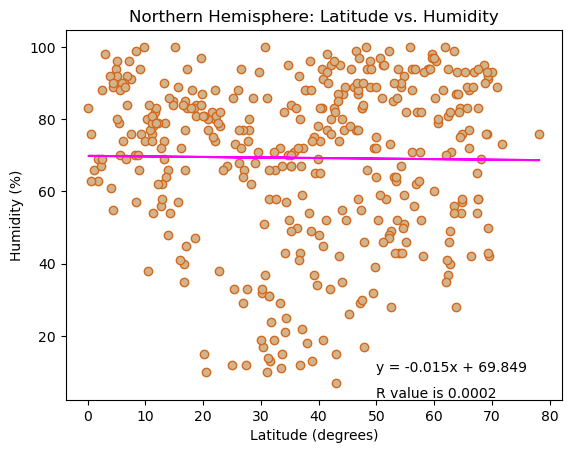

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

linear_regression_model(x, y, "Humidity (%)", "Northern Hemisphere: Latitude vs. Humidity", (50, 10), (50, 3), "Fig_7.png")

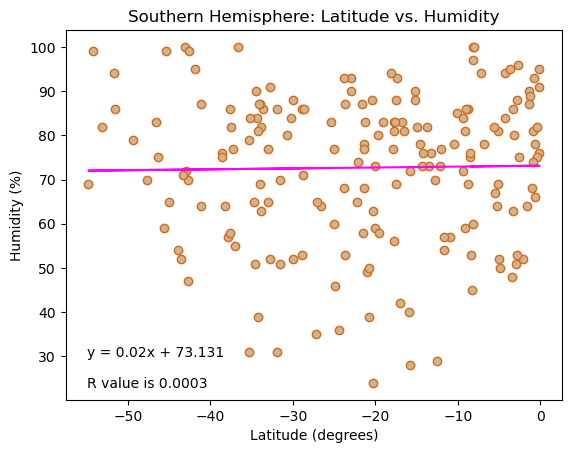

In [27]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

linear_regression_model(x, y, "Humidity (%)", "Southern Hemisphere: Latitude vs. Humidity", (-55, 30), (-55, 23), "Fig_8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In both plots, R value is almost 0 and the horizontal linear regression line implies that both in northern and southern hemispheres, humidity % is not really related to Latitude..  

### Cloudiness vs. Latitude Linear Regression Plot

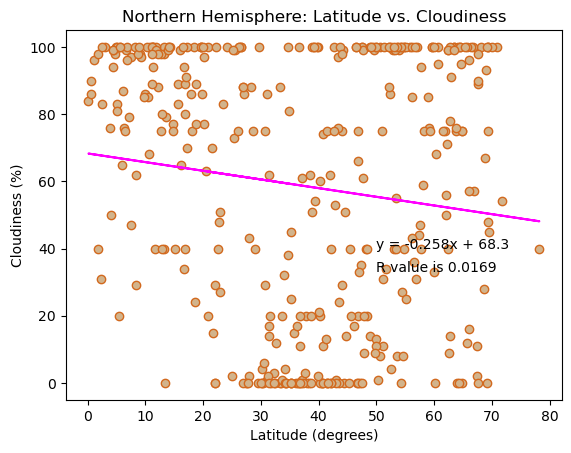

In [28]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

linear_regression_model(x, y, "Cloudiness (%)", "Northern Hemisphere: Latitude vs. Cloudiness", (50, 40), (50, 33), "Fig_9.png")

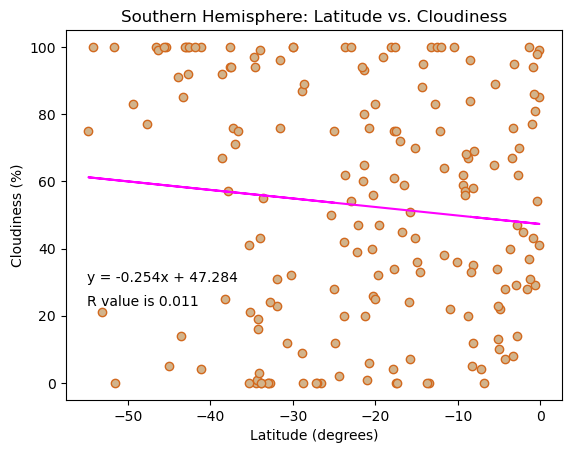

In [29]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

linear_regression_model(x, y, "Cloudiness (%)", "Southern Hemisphere: Latitude vs. Cloudiness", (-55, 30), (-55, 23), "Fig_10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In both plots, data points are scattered, R value is very low and the linear regression line has negative slope which implies that both in northern and southern hemispheres, as we move towards equator, cloudiness decreases.

### Wind Speed vs. Latitude Linear Regression Plot

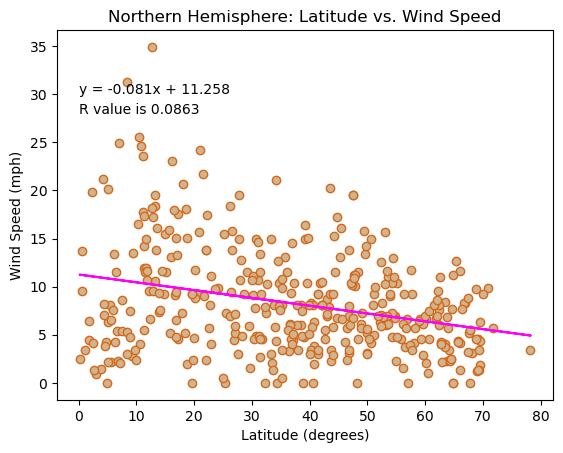

In [30]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

linear_regression_model(x, y, "Wind Speed (mph)", "Northern Hemisphere: Latitude vs. Wind Speed", (0, 30), (0, 28), "Fig_11.png")

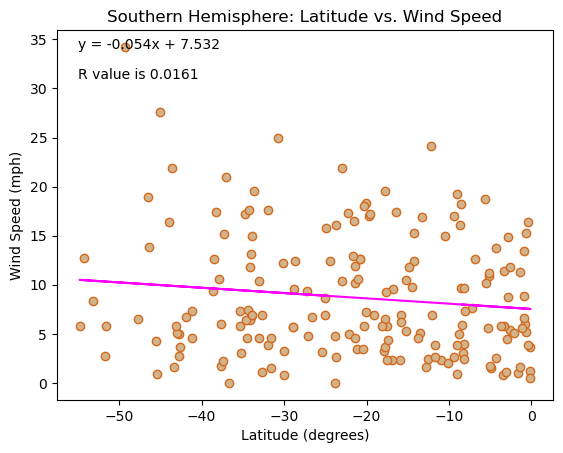

In [31]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

linear_regression_model(x, y, "Wind Speed (mph)", "Southern Hemisphere: Latitude vs. Wind Speed", (-55, 34), (-55, 31), "Fig_12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In northern hemisphere, data was tightly packed, has good R value and negative slope which implies that windspeed decreases as we move away from equator towards north pole.
In southern hemisphere, data was not so tightly packed, has good R value and negative slope which implies that windspeed decreases as we move away towards equator from south pole.